# Gradient Descent Techniques for Rigde Regression 
## <div> Vassilis Panagakis </div>

# Load Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Create a dataframe from HousingData.csv file data

In [3]:
housing=pd.read_csv('gdrive/My Drive/Colab Notebooks/HousingData.csv', usecols=['MedInc','HouseAge','AveRooms','AveBedrms','Population',
                                                                               'AveOccup','Latitude','Longitude','Median House Value'])
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609


## Split Data

In [4]:
X = housing.drop('Median House Value', axis=1) #dataframe to store train data without the labels
y = housing[['Median House Value']] #dataframe to store train labels

In [5]:
from sklearn.model_selection import train_test_split

#get train and test dataframes 
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state = 42)

#### Display train and test sets after split

In [6]:
train_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4520,1.8485,48.0,4.754386,1.315789,571.0,5.008772,34.02,-118.24
15799,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
12738,4.2759,33.0,5.513120,0.973761,932.0,2.717201,33.81,-117.94
5196,4.0272,45.0,4.583721,1.020930,1245.0,2.895349,34.13,-118.24
11490,2.0368,37.0,5.662651,1.265060,522.0,6.289157,34.17,-119.11


In [7]:
test_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14911,4.9219,35.0,6.154062,0.988796,945.0,2.647059,32.82,-117.19
16468,4.5083,34.0,5.233010,0.995146,575.0,2.791262,33.85,-118.00
3550,2.5625,15.0,5.341463,1.045296,674.0,2.348432,38.75,-120.86
1547,3.1917,35.0,3.908759,1.058394,1412.0,5.153285,33.89,-118.08
11356,6.0308,38.0,5.857778,1.053333,547.0,2.431111,33.82,-118.38


## Data Pre-processing

In [8]:
#standarize training set
for label, content in train_X.items():
    train_X[label] = train_X[label]/np.max(train_X[label])

train_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4520,0.123233,0.923077,0.033503,0.038624,0.019989,0.008352,0.810965,1.032754
15799,0.271425,0.365385,0.435578,0.322896,0.003921,0.003891,0.929917,1.048651
12738,0.285058,0.634615,0.038850,0.028584,0.032626,0.004531,0.805959,1.030134
5196,0.268478,0.865385,0.032300,0.029969,0.043583,0.004828,0.813588,1.032754
11490,0.135786,0.711538,0.039903,0.037135,0.018273,0.010487,0.814541,1.040353


In [9]:
#standarize test set
for label, content in test_X.items():
    test_X[label] = test_X[label]/np.max(test_X[label])

test_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14911,0.328124,0.673077,0.102782,0.064574,0.026484,0.002129,0.782360,1.022868
16468,0.300551,0.653846,0.087399,0.064989,0.016115,0.002245,0.806913,1.029938
3550,0.170832,0.288462,0.089210,0.068264,0.018889,0.001889,0.923719,1.054901
1547,0.212779,0.673077,0.065282,0.069120,0.039572,0.004145,0.807867,1.030636
11356,0.402051,0.730769,0.097833,0.068789,0.015330,0.001955,0.806198,1.033255


In [10]:
#create numpy arrays for train and test sets
train_x = train_X.values
test_x = test_X.values

In [11]:
#add a bias to the data
train_x = np.hstack((np.ones((train_x.shape[0], 1)), train_x)) 
test_x = np.hstack((np.ones((test_x.shape[0], 1)), test_x)) 

In [12]:
#create numpy arrays for sets' labels
train_y = train_Y.values
train_y = train_y.reshape(-1, 1)

test_y = test_Y.values
test_y = test_y.reshape(-1, 1)

# CLASSIFICATION

## Gradient Descent

**source:** https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

In [13]:
# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta):
  return np.dot(X, theta) 

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
  h = hypothesis(X, theta) 
  grad = np.dot(X.transpose(), (h - y)) 
  return grad 

# function to compute the error for current values of theta 
def cost(X, y, theta): 
  h = hypothesis(X, theta) 
  J = np.dot((h - y).transpose(), (h - y)) 
  J /= 2
  return J[0] 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
  mini_batches = [] 
  data = np.hstack((X, y)) 
  np.random.shuffle(data) 
  n_minibatches = data.shape[0] // batch_size 
  
  i = 0
  for i in range(n_minibatches + 1): 
    mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
    X_mini = mini_batch[:, :-1] 
    Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
    mini_batches.append((X_mini, Y_mini)) 
  if data.shape[0] % batch_size != 0: 
    mini_batch = data[i * batch_size:data.shape[0]] 
    X_mini = mini_batch[:, :-1] 
    Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
    mini_batches.append((X_mini, Y_mini)) 
  return mini_batches 

# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.01, max_iters = 1000, batch_size = 1): 
  theta = np.zeros((X.shape[1], 1)) 
  # error_list = [] 
  error_list = np.zeros(max_iters)
  for itr in range(max_iters): 
    total_cost = 0.0
    mini_batches = create_mini_batches(X, y, batch_size) 
    for mini_batch in mini_batches:
      X_mini, y_mini = mini_batch 
      grad = gradient(X_mini, y_mini, theta)
      theta = theta - learning_rate * grad 
      c = cost(X_mini, y_mini, theta)
      if(c[0] != 0):
        total_cost += c
    error_list[itr] = total_cost

  return theta, error_list 

In [14]:
# function that creates the plot of Cost/MSE per iteration
def JPerIteration(iters, error_list, title):
  fig,ax = plt.subplots(figsize=(10,6))

  ax.set_title(title, size=20)
  ax.set_ylabel('Cost/MSE', size=20)
  ax.set_xlabel('Iterations', size=20)
  _=ax.plot(range(iters), error_list, 'b.')

## Full-Batch Gradient Descent

In [15]:
lr_fbgd = 0.00004 #learning rate
iters_fbgd = 800  #iterations

In [16]:
from sklearn import metrics

theta_fbgd, err_list_fbgd = gradientDescent(train_x, train_y, learning_rate=lr_fbgd, max_iters=iters_fbgd, batch_size=train_x.shape[0]) 

y_pred_fbgd = hypothesis(test_x, theta_fbgd) #prediction on test set 

#R^2 is a better metric for presentation purposes but it doesn't take into considaration the overfitting problem
r2_fbgd = "%.3f%%" % (metrics.r2_score(test_y, y_pred_fbgd) * 100) 

print("R^2 = ", r2_fbgd)

R^2 =  50.334%


In [17]:
#Root Mean Square Error(RMSE) is a good metric to compare performance between different regression model
mse_fbgd = metrics.mean_squared_error(test_y, y_pred_fbgd)
mse_fbgd = np.sqrt(mse_fbgd)
mse_fbgd = "%.3f" % mse_fbgd

print("RMSE = ", mse_fbgd)

RMSE =  0.816


In [18]:
print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta_fbgd[0][0],theta_fbgd[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(err_list_fbgd[-1]))

Theta0:          0.385
Theta1:          6.409
Final cost/MSE:  4226.668


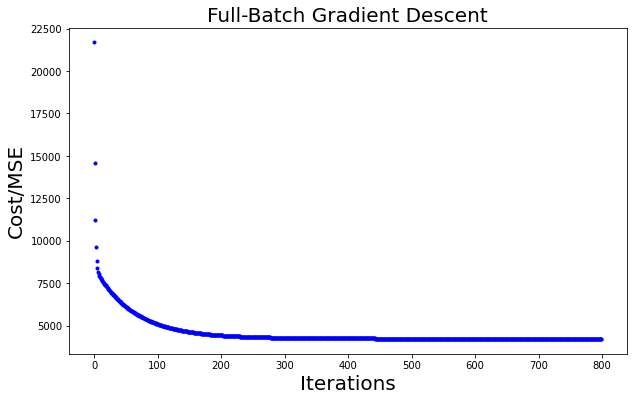

In [19]:
JPerIteration(iters_fbgd, err_list_fbgd, 'Full-Batch Gradient Descent')

**The execution of the Full-Batch Gradient model is fast, because the whole training set is fitted at once, turning the complexity of the nested loop to O(1). We notice, that after around 450 iterations the cost is almost flat so the remaining iterations are not needed, because they will not result in any further optimization. We can see this clearly if we zoom the plot until iteration 450.**

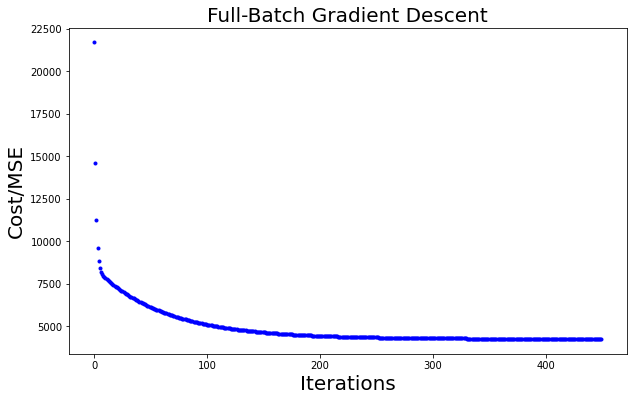

In [20]:
JPerIteration(450, err_list_fbgd[:450], 'Full-Batch Gradient Descent')

## Stochastic Gradient Descent

In [21]:
lr_sgd = 0.001    #learning rate
iters_sgd = 1200  #iterations

In [22]:
theta_sgd, err_list_sgd = gradientDescent(train_x, train_y, learning_rate=lr_sgd, max_iters=iters_sgd, batch_size=1) 

y_pred_sgd = hypothesis(test_x, theta_sgd) #prediction on test set 

#R^2 is a better metric for presentation purposes but it doesn't take into considaration the overfitting problem
r2_sgd = "%.3f%%" % (metrics.r2_score(test_y, y_pred_sgd) * 100) 

print("R^2 = ", r2_sgd)

R^2 =  54.588%


In [23]:
#Root Mean Square Error(RMSE) is a good metric to compare performance between different regression model
mse_sgd = metrics.mean_squared_error(test_y, y_pred_sgd)
mse_sgd = np.sqrt(mse_sgd)
mse_sgd = "%.3f" % mse_sgd

print("RMSE = ", mse_sgd)

RMSE =  0.780


In [24]:
print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta_sgd[0][0],theta_sgd[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(err_list_sgd[-1]))

Theta0:          -10.347
Theta1:          6.454
Final cost/MSE:  3783.909


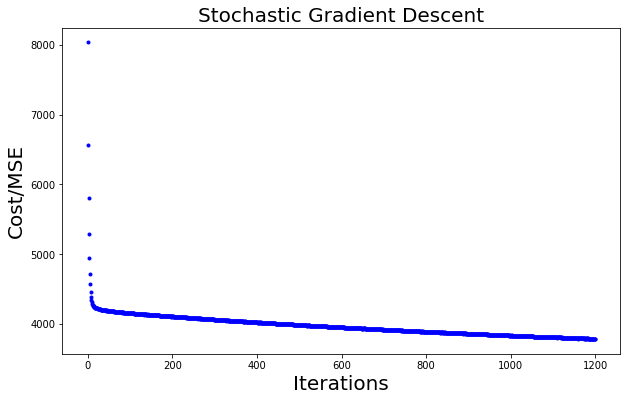

In [25]:
JPerIteration(iters_sgd, err_list_sgd, 'Stochastic Gradient Descent')

**We observe that the Stochastic Gradient Descent model produces a better R^2 score than the Full-Batch Gradient Descent one. Yet, after 1200 iterations the cost is not flat and it would need even more iterations to converge to a minimum. Moreover, it clearly needs much more time to conclude its execution, because of the use of the minimum batch size (=1). <br>
We conclude, that if we are more interested in prediction accuracy we should select the Stochastic Gradient Descent model, but if we care for fast and decent results the Full-Batch Gradient Descent model is more preferable.**

## Mini-Batch Gradient Descent

In [26]:
lr_mbgd = 0.001    #learning rate
iters_mbgd = 1000 #iterations
batch_mbgd = 10   #batch size

In [27]:
theta_mbgd, err_list_mbgd = gradientDescent(train_x, train_y, learning_rate=lr_mbgd, max_iters=iters_mbgd, batch_size=batch_mbgd) 

y_pred_mbgd = hypothesis(test_x, theta_mbgd) #prediction on test set 

#R^2 is a better metric for presentation purposes but it doesn't take into considaration the overfitting problem
r2_mbgd = "%.3f%%" % (metrics.r2_score(test_y, y_pred_mbgd) * 100) 

print("R^2 = ", r2_mbgd)

R^2 =  55.147%


In [28]:
#Root Mean Square Error(RMSE) is a good metric to compare performance between different regression model
mse_mbgd = metrics.mean_squared_error(test_y, y_pred_mbgd)
mse_mbgd = np.sqrt(mse_mbgd)
mse_mbgd = "%.3f" % mse_mbgd

print("RMSE = ", mse_mbgd)

RMSE =  0.775


In [29]:
print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta_mbgd[0][0],theta_mbgd[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(err_list_mbgd[-1]))

Theta0:          -8.654
Theta1:          6.450
Final cost/MSE:  3833.025


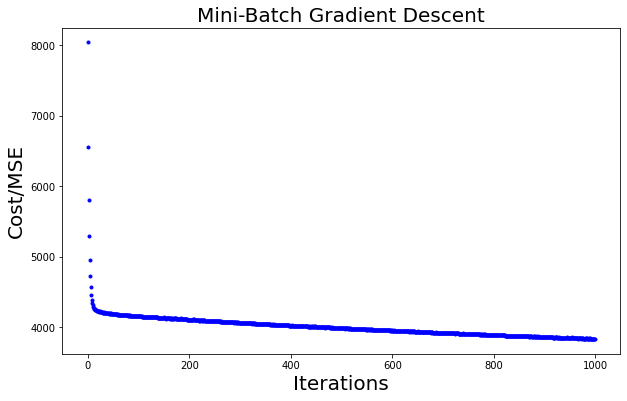

In [30]:
JPerIteration(iters_mbgd, err_list_mbgd, 'Mini-Batch Gradient Descent')

**We observe that the Mini-Batch Gradient Descent (with batch size = 10) model is slightly slower than the Full-Batch Gradient Descent model and much faster than the Stochastic Gradient Descent one. We also notice that it produces a better R^2 score than the Full-Batch Gradient Descent and a very close one to the Stochastic Gradient Descent. <br>
We conclude, that if we find the proper batch size, the Mini-Batch Gradient Descent model is the best solution in terms of a very satisfactory prediction accuracy and a fast execution time, compared to the other 2 models, of which each thrives in only one of the 2 domains.**